In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
DATA_DIR = "data/archive/cleaned_dataset/data"
OUTPUT_COMBINED = "nasa_battery_master.csv"

In [9]:
all_dfs = []
files = sorted([f for f in os.listdir(DATA_DIR) if f.endswith(".csv")])

print(f"Found {len(files)} files")

Found 7565 files


In [13]:
for f in files:
    file_id = f.replace(".csv", "")  # e.g., "0001"
    df = pd.read_csv(DATA_DIR+"/"+f)
    df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]
    df["file_id"] = int(file_id)
    all_dfs.append(df)


In [14]:
data = pd.concat(all_dfs, ignore_index=True)

In [15]:
print("Master Data Shape:",data.shape)

Maaster Data Shape: (7376834, 14)


In [18]:
print("\nColumns in dataset:", list(data.columns))
print("\nMissing values summary:\n", data.isnull().sum())



Columns in dataset: ['voltage_measured', 'current_measured', 'temperature_measured', 'current_load', 'voltage_load', 'time', 'file_id', 'sense_current', 'battery_current', 'current_ratio', 'battery_impedance', 'rectified_impedance', 'current_charge', 'voltage_charge']

Missing values summary:
 voltage_measured          94145
current_measured          94145
temperature_measured      94145
current_load            6606764
voltage_load            6606764
time                      93888
file_id                       0
sense_current           7282946
battery_current         7282946
current_ratio           7282946
battery_impedance       7282946
rectified_impedance     7300550
current_charge           863958
voltage_charge           863958
dtype: int64


In [19]:
for col in data.select_dtypes(include="number").columns:
    data[col] = data[col].interpolate(method="linear")

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7376834 entries, 0 to 7376833
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   voltage_measured      float64
 1   current_measured      float64
 2   temperature_measured  float64
 3   current_load          float64
 4   voltage_load          float64
 5   time                  float64
 6   file_id               int64  
 7   sense_current         object 
 8   battery_current       object 
 9   current_ratio         object 
 10  battery_impedance     object 
 11  rectified_impedance   object 
 12  current_charge        float64
 13  voltage_charge        float64
dtypes: float64(8), int64(1), object(5)
memory usage: 787.9+ MB


In [21]:
data.describe()

,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time,file_id,current_charge,voltage_charge
count,7.376834e+06,7.376834e+06,7.376834e+06,7.376834e+06,7.376834e+06,7.376834e+06,7.376834e+06,7.376296e+06,7.376296e+06
mean,4.043342e+00,2.835125e-01,2.222463e+01,3.368414e-01,3.216616e-01,4.793069e+03,3.880442e+03,4.504616e-01,3.700489e+00
std,4.723955e-01,9.204157e-01,1.236220e+01,7.830480e-01,7.522130e-01,3.131544e+03,2.146868e+03,5.661653e-01,1.633259e+00
min,-1.422157e-03,-4.508828e+00,2.852221e+00,-2.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-4.513000e+00,-1.000000e-02
25%,4.114655e+00,3.571217e-02,7.411301e+00,4.000000e-04,0.000000e+00,1.988485e+03,1.946000e+03,3.700000e-02,4.224000e+00
50%,4.196783e+00,1.402797e-01,2.467411e+01,6.000000e-04,0.000000e+00,4.508852e+03,4.001000e+03,1.400000e-01,4.288000e+00
75%,4.205271e+00,7.519432e-01,2.758486e+01,8.000000e-04,3.780938e-02,7.486172e+03,5.722000e+03,7.522000e-01,4.570000e+00
max,8.393141e+00,1.536047e+00,6.986975e+01,4.148800e+00,9.700000e+01,1.081880e+04,7.565000e+03,1.507000e+00,5.011000e+00


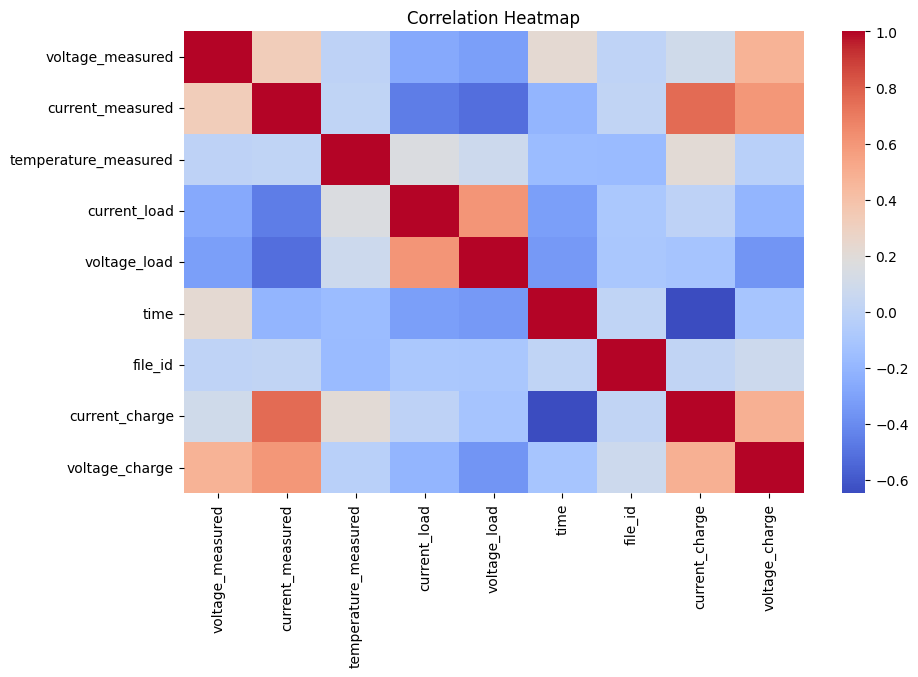

In [32]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(numeric_only=True), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [33]:
if 'cycle' in data.columns and 'capacity' in data.columns:
    plt.figure(figsize=(10,6))
    sns.lineplot(data=data, x="cycle", y="capacity", hue="battery_id", alpha=0.6)
    plt.title("Capacity Degradation Across Cycles")
    plt.show()

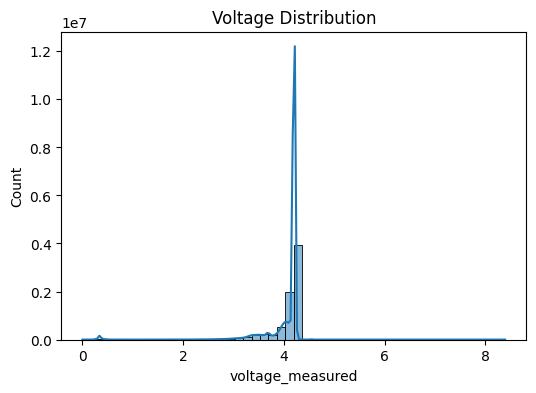

In [25]:
if "voltage_measured" in data.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(data["voltage_measured"], bins=50, kde=True)
    plt.title("Voltage Distribution")
    plt.show()

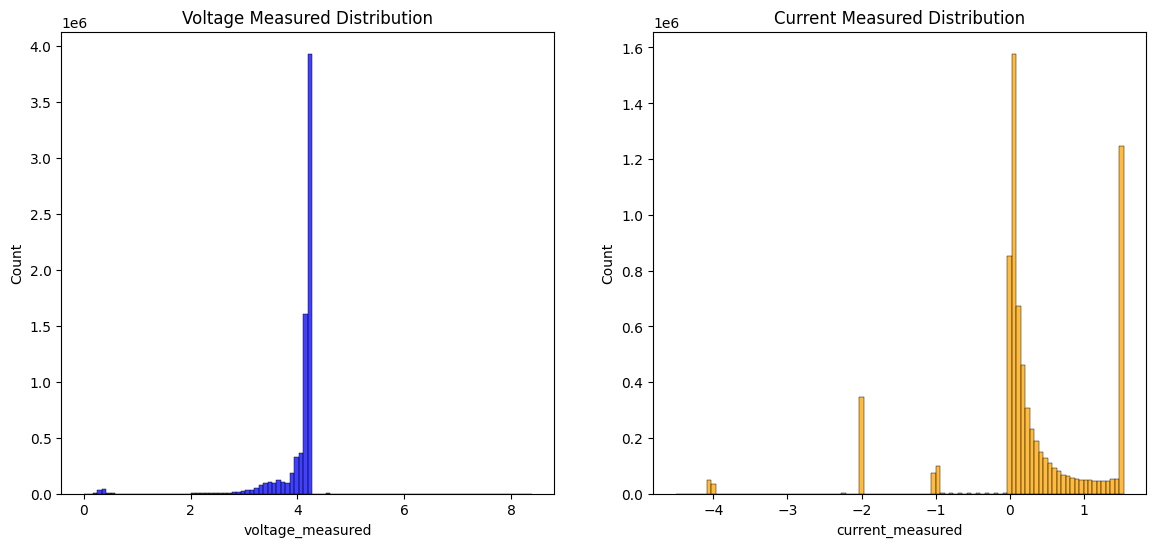

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))

sns.histplot(data['voltage_measured'], bins=100, ax=axes[0], color="blue")
axes[0].set_title("Voltage Measured Distribution")

sns.histplot(data['current_measured'], bins=100, ax=axes[1], color="orange")
axes[1].set_title("Current Measured Distribution")

plt.show()

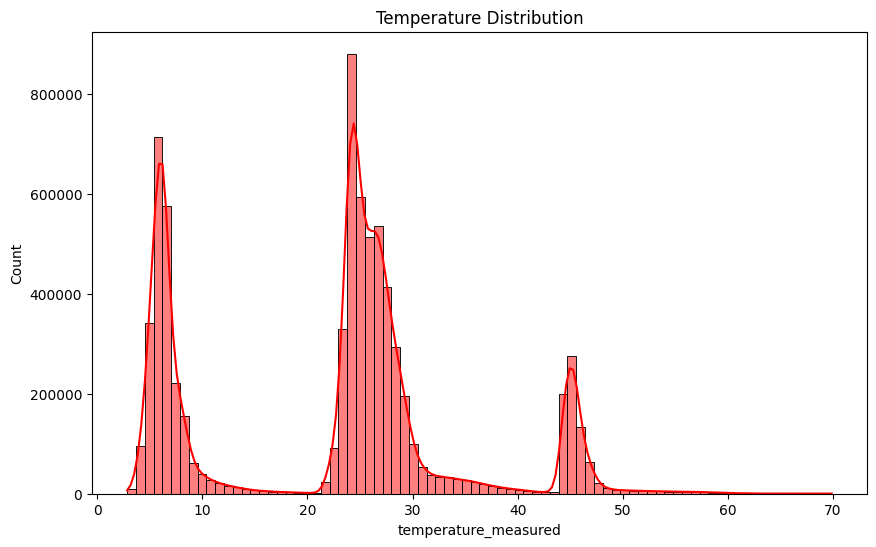

In [35]:
plt.figure(figsize=(10,6))
sns.histplot(data['temperature_measured'], bins=80, kde=True, color="red")
plt.title("Temperature Distribution")
plt.show()

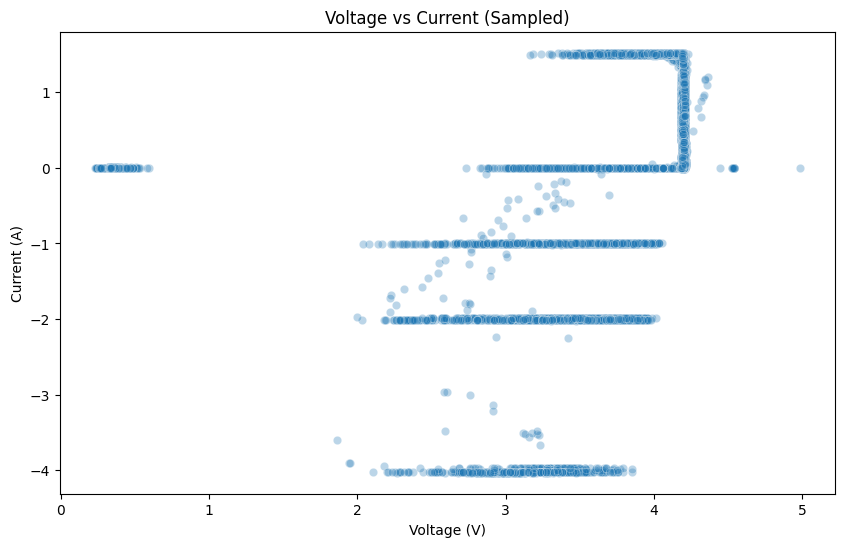

In [36]:
sample = data.sample(50000, random_state=42)  # sample to avoid heavy plotting
plt.figure(figsize=(10,6))
sns.scatterplot(data=sample, x="voltage_measured", y="current_measured", alpha=0.3)
plt.title("Voltage vs Current (Sampled)")
plt.xlabel("Voltage (V)")
plt.ylabel("Current (A)")
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data['battery_impedance'], bins=100, kde=True, color="purple")
plt.title("Battery Impedance Distribution")
plt.show()

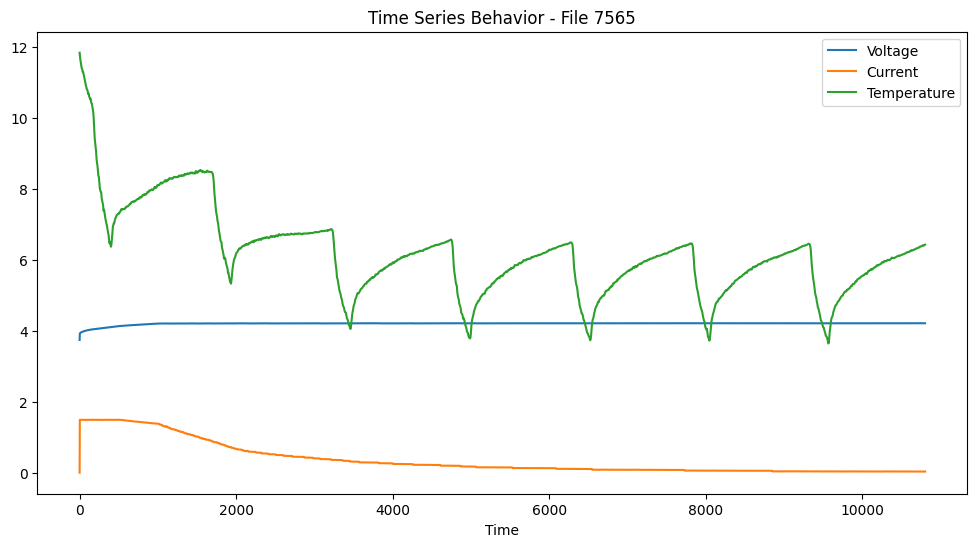

In [30]:
example_files = df['file_id'].unique()[:3]  # pick 3 files
for fid in example_files:
    temp = df[df['file_id'] == fid].head(2000)  # limit rows per file
    plt.figure(figsize=(12,6))
    plt.plot(temp['time'], temp['voltage_measured'], label="Voltage")
    plt.plot(temp['time'], temp['current_measured'], label="Current")
    plt.plot(temp['time'], temp['temperature_measured'], label="Temperature")
    plt.title(f"Time Series Behavior - File {fid}")
    plt.xlabel("Time")
    plt.legend()
    plt.show()

In [41]:
data.to_csv(OUTPUT_COMBINED, index=False)
print(f"\n✅ Master dataset saved to: {OUTPUT_COMBINED}")


✅ Master dataset saved to: nasa_battery_master.csv
